In [179]:
import scvelo as scv
import pandas as pd

In [180]:
diff3 = scv.read('Diff_3/velocyto/Diff_3.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [181]:
diff4 = scv.read('Diff_4/velocyto/Diff_4.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [182]:
reg1 = scv.read('Regular_1/velocyto/Regular_1.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [183]:
reg2 = scv.read('Regular_2/velocyto/Regular_2.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [194]:
umap = pd.read_table('second_Larry_integrative_res1_labelled_umap.xls')
meta = pd.read_table('second_Larry_integrative_res1_labelled_meta.xls')

In [195]:
cellnames = list(map(lambda x, y: f"{x}:{y.split('_')[0]+'x'}", meta.loc[:, 'orig.ident'], meta.index))

In [196]:
meta.index = cellnames
umap.index = cellnames

In [197]:
umap.head()

UMAP_1    UMAP_2
Regular_1:AAACCCAAGATGGGCTx  2.646962  5.005016
Regular_1:AAACCCAAGCAAGGAAx -0.501442  1.737569
Regular_1:AAACCCAAGGTTCAGGx  2.620645 -6.675629
Regular_1:AAACCCACACGCGTGTx -1.994728 -0.253414
Regular_1:AAACCCACAGACAAGCx  3.217281 -1.473950

In [198]:
meta.head()

orig.ident  nCount_RNA  nFeature_RNA  \
Regular_1:AAACCCAAGATGGGCTx  Regular_1       12458          3857   
Regular_1:AAACCCAAGCAAGGAAx  Regular_1        7682          2840   
Regular_1:AAACCCAAGGTTCAGGx  Regular_1       18534          4426   
Regular_1:AAACCCACACGCGTGTx  Regular_1        6068          2376   
Regular_1:AAACCCACAGACAAGCx  Regular_1        8696          3177   

                             percent.mito  percent.ribo  lib.size.10k  \
Regular_1:AAACCCAAGATGGGCTx      9.359448     20.372451      0.351371   
Regular_1:AAACCCAAGCAAGGAAx      5.779745     24.212445      0.247531   
Regular_1:AAACCCAAGGTTCAGGx      6.755153     23.637639      0.455363   
Regular_1:AAACCCACACGCGTGTx      7.663151     21.852340      0.205962   
Regular_1:AAACCCACAGACAAGCx      7.221711     18.491260      0.271749   

                             RNA_snn_res.0.4  RNA_snn_res.0.6  \
Regular_1:AAACCCAAGATGGGCTx                2                1   
Regular_1:AAACCCAAGCAAGGAAx                0                3   
Regular_1:AAACCCAAGGTTCAGGx                4                5   
Regular_1:AAACCCACACGCGTGTx                3                4   
Regular_1:AAACCCACAGACAAGCx                0                2   

                             RNA_snn_res.0.8  RNA_snn_res.1  RNA_snn_res.1.2  \
Regular_1:AAACCCAAGATGGGCTx                1             10                6   
Regular_1:AAACCCAAGCAAGGAAx                2              0                1   
Regular_1:AAACCCAAGGTTCAGGx                7              7                5   
Regular_1:AAACCCACACGCGTGTx                3              3                2   
Regular_1:AAACCCACAGACAAGCx                0              1                8   

                             RNA_snn_res.1.4  RNA_snn_res.1.6  \
Regular_1:AAACCCAAGATGGGCTx                4                5   
Regular_1:AAACCCAAGCAAGGAAx                2                1   
Regular_1:AAACCCAAGGTTCAGGx                7                7   
Regular_1:AAACCCACACGCGTGTx                3                4   
Regular_1:AAACCCACAGACAAGCx                9                6   

                             RNA_snn_res.1.8  RNA_snn_res.2 seurat_clusters  \
Regular_1:AAACCCAAGATGGGCTx                3              2          Prolif   
Regular_1:AAACCCAAGCAAGGAAx                0              0          Ground   
Regular_1:AAACCCAAGGTTCAGGx                8              8            tEMT   
Regular_1:AAACCCACACGCGTGTx                5              4          Prolif   
Regular_1:AAACCCACAGACAAGCx                4              5          Ground   

                             seurat_clusters2     celltype.stim celltype  
Regular_1:AAACCCAAGATGGGCTx                10  Prolif_Regular_1   Prolif  
Regular_1:AAACCCAAGCAAGGAAx                 0  Ground_Regular_1   Ground  
Regular_1:AAACCCAAGGTTCAGGx                 7     EMT_Regular_1      EMT  
Regular_1:AAACCCACACGCGTGTx                 3  Prolif_Regular_1   Prolif  
Regular_1:AAACCCACAGACAAGCx                 1  Ground_Regular_1   Ground

In [199]:
reg1_cells = reg1.obs_names[reg1.obs_names.isin(meta.index)]

In [200]:
reg2_cells = reg2.obs_names[reg2.obs_names.isin(meta.index)]

In [201]:
diff3_cells = diff3.obs_names[diff3.obs_names.isin(meta.index)]

In [202]:
diff4_cells = diff4.obs_names[diff4.obs_names.isin(meta.index)]

In [203]:
diff3 = diff3[diff3_cells, :]
diff3.obsm['X_umap'] = umap.loc[diff3.obs_names, :].values
diff3.obs['cellstate'] = meta.loc[diff3.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [204]:
diff4 = diff4[diff4_cells, :]
diff4.obsm['X_umap'] = umap.loc[diff4.obs_names, :].values
diff4.obs['cellstate'] = meta.loc[diff4.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [205]:
reg1 = reg1[reg1_cells, :]
reg1.obsm['X_umap'] = umap.loc[reg1.obs_names, :].values
reg1.obs['cellstate'] = meta.loc[reg1.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [206]:
reg2 = reg2[reg2_cells, :]
reg2.obsm['X_umap'] = umap.loc[reg2.obs_names, :].values
reg2.obs['cellstate'] = meta.loc[reg2.obs_names, 'seurat_clusters'].values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [216]:
color_dict = {
    'Ground':  '#773E14',
    'Hypoxia': "#EC8528",
    'UPR':  '#F1FA64',
    'EMT':  '#3B1673',
    'iEMT':  '#3B1673',
    'tEMT':  '#3B1673',    
    'Prolif': '#1440D8',
    'Muscle': '#E12727',
    'Histone': '#E24B8F',
    'Apoptosis': '#9E3CC8', 
    'Interferon': '#489F4B',
    'Unique#6': 'gray',
    'Unique#7': 'gray',
    'Unique#8': 'gray',
    'Unique #5': 'gray',
    'Unique #1': 'gray',
    'Unique #2': 'gray',
    'Unique #3': 'gray',
    'Unique #4': 'gray',
    'Unique #2_4': 'gray',
    'Unique #2_4_6': 'gray',
    'Unique #3_5_Muscle': 'gray',
    'Neural': '#00FFFD'
}
diff3.obs.loc[:, 'clusters'] = diff3.obs.loc[:, 'cellstate'].map({"iEMT": 'EMT', 'Ground': 'Ground', 'tEMT': 'EMT',
                                   "Muscle": 'Muscle', "Prolif": "Prolif"}).astype('category')

diff3.uns['clusters_colors'] = [color_dict[c] for c in diff3.obs['clusters'].cat.categories]
diff4.obs.loc[:, 'clusters'] = diff4.obs.loc[:, 'cellstate'].map({"iEMT": 'EMT', 'Ground': 'Ground', 'tEMT': 'EMT',
                                   "Muscle": 'Muscle', "Prolif": "Prolif"}).astype('category')
diff4.uns['clusters_colors'] = [color_dict[c] for c in diff4.obs['clusters'].cat.categories]
reg1.obs.loc[:, 'clusters'] = reg1.obs.loc[:, 'cellstate'].map({"iEMT": 'EMT', 'Ground': 'Ground', 'tEMT': 'EMT',
                                   "Muscle": 'Muscle', "Prolif": "Prolif"}).astype('category')
reg1.uns['clusters_colors'] = [color_dict[c] for c in reg1.obs['clusters'].cat.categories]
reg2.obs.loc[:, 'clusters'] = reg2.obs.loc[:, 'cellstate'].map({"iEMT": 'EMT', 'Ground': 'Ground', 'tEMT': 'EMT',
                                   "Muscle": 'Muscle', "Prolif": "Prolif"}).astype('category')
reg2.uns['clusters_colors'] = [color_dict[c] for c in reg2.obs['clusters'].cat.categories]

# Velocity analysis

In [217]:
scv.pp.filter_and_normalize(diff3, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(diff3, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(diff3, n_jobs=30)
scv.tl.velocity(diff3, mode='dynamical')
scv.tl.latent_time(diff3)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23413 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 30/256 cores)


  0%|          | 0/603 [00:00<?, ?gene/s]

    finished (0:01:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/4687 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [218]:
scv.pp.filter_and_normalize(reg1, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(reg1, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(reg1, n_jobs=30)
scv.tl.velocity(reg1, mode='dynamical')
scv.tl.latent_time(reg1)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23644 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 30/256 cores)


  0%|          | 0/482 [00:00<?, ?gene/s]

    finished (0:01:02) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/9367 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:04) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)


In [219]:
scv.pp.filter_and_normalize(reg2, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(reg2, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(reg2, n_jobs=30)
scv.tl.velocity(reg2, mode='dynamical')
scv.tl.latent_time(reg2)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 22878 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 30/256 cores)


  0%|          | 0/699 [00:00<?, ?gene/s]

    finished (0:00:41) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/5635 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


In [220]:
scv.pp.filter_and_normalize(diff4, min_shared_counts=20, n_top_genes=1000)
scv.pp.moments(diff4, n_pcs=50, n_neighbors=50)
scv.tl.recover_dynamics(diff4, n_jobs=30)
scv.tl.velocity(diff4, mode='dynamical')
scv.tl.latent_time(diff4)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23080 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 30/256 cores)


  0%|          | 0/621 [00:00<?, ?gene/s]

    finished (0:00:24) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/256 cores)


  0%|          | 0/5016 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


# Larry clone analysis

In [221]:
import anndata
adata_all = anndata.AnnData.concatenate(reg1, reg2, diff3, diff4)

In [222]:
adata_all.obs.tail()

Clusters         _X         _Y cellstate clusters  \
Diff_4:TTTGGAGAGAGTTGCGx-3         2   1.359418 -35.872223    Ground   Ground   
Diff_4:TTTGGAGCATAACGGGx-3         4   1.160254  -8.028554    Ground   Ground   
Diff_4:TTTCCTCGTAACCAGGx-3         1  27.653418   2.848965    Prolif   Prolif   
Diff_4:TTTGACTGTTACGTACx-3         1  22.741411   1.743161    Ground   Ground   
Diff_4:TTTGTTGAGTCCCAGCx-3         8 -46.488510   7.232860    Ground   Ground   

                            initial_size_spliced  initial_size_unspliced  \
Diff_4:TTTGGAGAGAGTTGCGx-3                  5953                    2671   
Diff_4:TTTGGAGCATAACGGGx-3                  3385                    2062   
Diff_4:TTTCCTCGTAACCAGGx-3                  9540                    6029   
Diff_4:TTTGACTGTTACGTACx-3                  3179                     172   
Diff_4:TTTGTTGAGTCCCAGCx-3                 12321                    7297   

                            initial_size     n_counts  \
Diff_4:TTTGGAGAGAGTTGCGx-3        5953.0  7880.808105   
Diff_4:TTTGGAGCATAACGGGx-3        3385.0  7932.990723   
Diff_4:TTTCCTCGTAACCAGGx-3        9540.0  8040.397949   
Diff_4:TTTGACTGTTACGTACx-3        3179.0  8709.874023   
Diff_4:TTTGTTGAGTCCCAGCx-3       12321.0  7875.673828   

                            velocity_self_transition  root_cells  end_points  \
Diff_4:TTTGGAGAGAGTTGCGx-3                  0.480572    0.026801    0.007295   
Diff_4:TTTGGAGCATAACGGGx-3                  0.022358    0.153255    0.004280   
Diff_4:TTTCCTCGTAACCAGGx-3                  0.235000    0.012857    0.006698   
Diff_4:TTTGACTGTTACGTACx-3                  0.295274    0.332937    0.003852   
Diff_4:TTTGTTGAGTCCCAGCx-3                  0.304744    0.037241    0.010205   

                            velocity_pseudotime  latent_time batch  
Diff_4:TTTGGAGAGAGTTGCGx-3             0.204674     0.265169     3  
Diff_4:TTTGGAGCATAACGGGx-3             0.158220     0.154830     3  
Diff_4:TTTCCTCGTAACCAGGx-3             0.109448     0.109925     3  
Diff_4:TTTGACTGTTACGTACx-3             0.081608     0.209527     3  
Diff_4:TTTGTTGAGTCCCAGCx-3             0.091196     0.118600     3

In [223]:
clone = pd.read_csv("RD_larry2_clone_mat_condition_specific2.csv", header=None)

In [224]:
cellbarcode = pd.read_csv("RD_cellbarcode.txt")

In [225]:
larrybarcode = pd.read_table("RD_larry2barcode_list_condition_specific2.txt", header=None)

In [226]:
clone.shape, cellbarcode.shape, larrybarcode.shape

((27506, 11769), (27506, 3), (11769, 1))

In [227]:
clone.columns = larrybarcode.iloc[:, 0].values

In [228]:
filter_barcodes = cellbarcode.apply(lambda x: ':'.join([x[2], x[1]]), axis=1).values

In [229]:
filter_barcodes[:10]

array(['Diff_3:AAACCCAAGACATGCG', 'Diff_3:AAACCCAGTCCGAAAG',
       'Diff_3:AAACCCATCAATCCGA', 'Diff_3:AAACCCATCGGAACTT',
       'Diff_3:AAACCCATCTGCTAGA', 'Diff_3:AAACGAAAGTTTGGCT',
       'Diff_3:AAACGAACACGCTGCA', 'Diff_3:AAACGAACAGACGCTC',
       'Diff_3:AAACGAACATCAGCTA', 'Diff_3:AAACGAAGTTCCTAAG'], dtype=object)

In [230]:
clone.index = filter_barcodes

In [231]:
import numpy as np
import re
np.intersect1d(adata_all.obs.index.map(lambda x:re.sub('x-.*', '', x)), 
               clone.index).shape, clone.shape, adata_all.shape

((24705,), (27506, 11769), (24705, 322))

In [232]:
clone = clone.loc[np.intersect1d(adata_all.obs.index.map(lambda x:re.sub('x-.*', '', x)), 
                  clone.index), :]

In [233]:
clone.shape

(24705, 11769)

In [234]:
def match(x, y):
    """return y index that match the x iterms"""
    ind_dict = {}
    for i, j in enumerate(y):
        ind_dict[j] = i
    inds = []
    for i in x:
        inds.append(ind_dict[i])
    return np.array(inds)

In [235]:
adata_all = adata_all[match(clone.index, 
                            adata_all.obs.index.map(lambda x:re.sub('x-.*', '', x))), :]

In [236]:
adata_all.shape

(24705, 322)

In [237]:
adata_all.obs.head()

Clusters         _X         _Y cellstate clusters  \
Diff_3:AAACCCAAGACATGCGx-2         5  -8.994737  -1.643477      iEMT      EMT   
Diff_3:AAACCCAGTCCGAAAGx-2         5 -11.835526  -5.400812      iEMT      EMT   
Diff_3:AAACCCATCTGCTAGAx-2        10 -31.101646  16.026609      iEMT      EMT   
Diff_3:AAACGAAAGTTTGGCTx-2         6  -9.728719 -20.810930    Muscle   Muscle   
Diff_3:AAACGAACACGCTGCAx-2         6  -2.163266 -23.991142      iEMT      EMT   

                            initial_size_spliced  initial_size_unspliced  \
Diff_3:AAACCCAAGACATGCGx-2                 13279                    4004   
Diff_3:AAACCCAGTCCGAAAGx-2                 15249                    6184   
Diff_3:AAACCCATCTGCTAGAx-2                 11251                    5889   
Diff_3:AAACGAAAGTTTGGCTx-2                  8959                    3821   
Diff_3:AAACGAACACGCTGCAx-2                 16041                    3032   

                            initial_size     n_counts  \
Diff_3:AAACCCAAGACATGCGx-2       13279.0  8808.698242   
Diff_3:AAACCCAGTCCGAAAGx-2       15249.0  8762.100586   
Diff_3:AAACCCATCTGCTAGAx-2       11251.0  8761.781250   
Diff_3:AAACGAAAGTTTGGCTx-2        8959.0  8817.437500   
Diff_3:AAACGAACACGCTGCAx-2       16041.0  8826.425781   

                            velocity_self_transition  root_cells  end_points  \
Diff_3:AAACCCAAGACATGCGx-2                  0.641187    0.058442    0.118162   
Diff_3:AAACCCAGTCCGAAAGx-2                  0.808751    0.000931    1.000000   
Diff_3:AAACCCATCTGCTAGAx-2                  0.247883    0.011915    0.034803   
Diff_3:AAACGAAAGTTTGGCTx-2                  0.111568    1.000000    0.042241   
Diff_3:AAACGAACACGCTGCAx-2                  0.611774    0.609727    0.002367   

                            velocity_pseudotime  latent_time batch  
Diff_3:AAACCCAAGACATGCGx-2             0.894617     0.520390     2  
Diff_3:AAACCCAGTCCGAAAGx-2             0.807446     0.620129     2  
Diff_3:AAACCCATCTGCTAGAx-2             0.304995     0.231370     2  
Diff_3:AAACGAAAGTTTGGCTx-2             0.405967     0.910842     2  
Diff_3:AAACGAACACGCTGCAx-2             0.421676     0.211906     2

In [238]:
(adata_all.obs.index.map(lambda x:re.sub('x-.*', '', x)) == clone.index).sum(), clone.shape

(24705, (24705, 11769))

In [239]:
import scipy
adata_all.obsm['X_clone'] = scipy.sparse.csr_matrix(clone.values)

In [240]:
adata_all.obs.head()

Clusters         _X         _Y cellstate clusters  \
Diff_3:AAACCCAAGACATGCGx-2         5  -8.994737  -1.643477      iEMT      EMT   
Diff_3:AAACCCAGTCCGAAAGx-2         5 -11.835526  -5.400812      iEMT      EMT   
Diff_3:AAACCCATCTGCTAGAx-2        10 -31.101646  16.026609      iEMT      EMT   
Diff_3:AAACGAAAGTTTGGCTx-2         6  -9.728719 -20.810930    Muscle   Muscle   
Diff_3:AAACGAACACGCTGCAx-2         6  -2.163266 -23.991142      iEMT      EMT   

                            initial_size_spliced  initial_size_unspliced  \
Diff_3:AAACCCAAGACATGCGx-2                 13279                    4004   
Diff_3:AAACCCAGTCCGAAAGx-2                 15249                    6184   
Diff_3:AAACCCATCTGCTAGAx-2                 11251                    5889   
Diff_3:AAACGAAAGTTTGGCTx-2                  8959                    3821   
Diff_3:AAACGAACACGCTGCAx-2                 16041                    3032   

                            initial_size     n_counts  \
Diff_3:AAACCCAAGACATGCGx-2       13279.0  8808.698242   
Diff_3:AAACCCAGTCCGAAAGx-2       15249.0  8762.100586   
Diff_3:AAACCCATCTGCTAGAx-2       11251.0  8761.781250   
Diff_3:AAACGAAAGTTTGGCTx-2        8959.0  8817.437500   
Diff_3:AAACGAACACGCTGCAx-2       16041.0  8826.425781   

                            velocity_self_transition  root_cells  end_points  \
Diff_3:AAACCCAAGACATGCGx-2                  0.641187    0.058442    0.118162   
Diff_3:AAACCCAGTCCGAAAGx-2                  0.808751    0.000931    1.000000   
Diff_3:AAACCCATCTGCTAGAx-2                  0.247883    0.011915    0.034803   
Diff_3:AAACGAAAGTTTGGCTx-2                  0.111568    1.000000    0.042241   
Diff_3:AAACGAACACGCTGCAx-2                  0.611774    0.609727    0.002367   

                            velocity_pseudotime  latent_time batch  
Diff_3:AAACCCAAGACATGCGx-2             0.894617     0.520390     2  
Diff_3:AAACCCAGTCCGAAAGx-2             0.807446     0.620129     2  
Diff_3:AAACCCATCTGCTAGAx-2             0.304995     0.231370     2  
Diff_3:AAACGAAAGTTTGGCTx-2             0.405967     0.910842     2  
Diff_3:AAACGAACACGCTGCAx-2             0.421676     0.211906     2

In [241]:
adata_all.obs['time_info'] = adata_all.obs_names.map(lambda x: x.split(":")[0]).values
adata_all.obs['state_info'] = adata_all.obs['cellstate']

In [242]:
adata_all.obsm['X_emb'] = adata_all.obsm['X_umap']
adata_all.uns['data_des'] = ['LARRY']

In [243]:
import cospar as cs
cs.hf.check_available_choices(adata_all)

Available transition maps: []
Available clusters: ['Muscle', 'iEMT', 'Ground', 'Interferon', 'Prolif', 'tEMT']
Available time points: ['Diff_3' 'Diff_4' 'Regular_1' 'Regular_2']
Clonal time points: ['Diff_3' 'Diff_4' 'Regular_1' 'Regular_2']


In [244]:
!mkdir -p LARRY_figure

Running cospar 0.1.9 (python 3.8.8) on 2022-01-27 19:57.


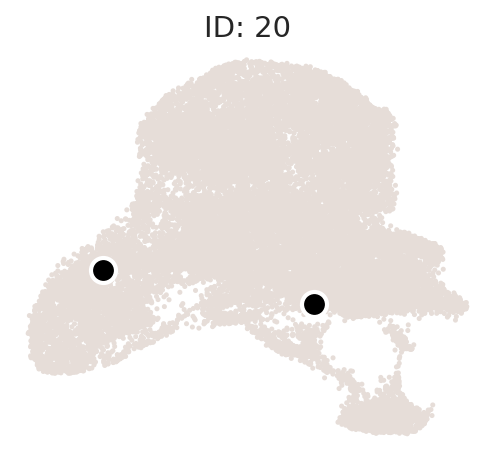

In [245]:
cs.logging.print_version()
cs.settings.verbosity=2
cs.settings.data_path='LARRY_data' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='LARRY_figure' # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(format='png',figsize=[4,3.5],dpi=75,fontsize=14,pointsize=2)

cs.pl.clones_on_manifold(adata_all, selected_clone_list=[20],color_list=['black','red','blue'])

In [246]:
adata_all.obsm['X_clone'] = adata_all.obsm['X_clone'][:, np.array((adata_all.obsm['X_clone'].sum(0)>0))[0]]

In [247]:
adata_all.obsm['X_clone'].shape

(24705, 11456)

In [248]:
np.where(adata_all.obsm['X_clone'].sum(0)>10)[1]

array([4365])

In [250]:
import numpy as np
adata_sub = adata_all[adata_all.obs.time_info.isin(["Regular_1", "Regular_2"]), :].copy()

starts = []
ends = []
centroids = []
for index in np.where(adata_sub.obsm['X_clone'].toarray().sum(0)>=2)[0]:
    cells_of_a_clone, = np.where(adata_sub.obsm['X_clone'].toarray()[:, index] == 1)
    if (np.unique(adata_sub.obs.time_info[cells_of_a_clone].values).shape[0]>=2):
        clone_cells = adata_sub[cells_of_a_clone, :]
        cond1 = clone_cells.obsm['X_umap'][clone_cells.obs.time_info.values=='Regular_1', ].mean(0)
        cond2 = clone_cells.obsm['X_umap'][clone_cells.obs.time_info.values=='Regular_2', ].mean(0)
        start = cond1
        end = cond2
        starts.append(start)
        ends.append(end)     
        
        adata_new = anndata.AnnData(clone_cells.X.toarray().mean(axis=0).reshape(1, -1), 
                                    var=clone_cells.var)
        adata_new.obs.loc[:, 'time'] = 'Regular_1'
        adata_new.obs.loc[:, 'clones'] = index
        adata_new.obs.loc[:, 'Cell type annotation'] = 'Centroid'
        adata_new.obsm['X_umap'] = start.reshape(1, -1)
        adata_new.obsm['velocity_umap'] = (end - start).reshape(1, -1)
        centroids.append(adata_new)

starts1 = np.vstack(starts)
ends1 = np.vstack(ends)
adata1 = adata_sub.concatenate(centroids[0].concatenate(centroids[1:]), join='outer')

In [251]:
import numpy as np
adata_sub = adata_all[adata_all.obs.time_info.isin(["Regular_1", "Diff_3"]), :].copy()

starts = []
ends = []
centroids = []
for index in np.where(adata_sub.obsm['X_clone'].toarray().sum(0)>=2)[0]:
    cells_of_a_clone, = np.where(adata_sub.obsm['X_clone'].toarray()[:, index] == 1)
    if (np.unique(adata_sub.obs.time_info[cells_of_a_clone].values).shape[0]>=2):
        clone_cells = adata_sub[cells_of_a_clone, :]
        cond1 = clone_cells.obsm['X_umap'][clone_cells.obs.time_info.values=='Regular_1', ].mean(0)
        cond2 = clone_cells.obsm['X_umap'][clone_cells.obs.time_info.values=='Diff_3', ].mean(0)
        start = cond1
        end = cond2
        starts.append(start)
        ends.append(end)     
        
        adata_new = anndata.AnnData(clone_cells.X.toarray().mean(axis=0).reshape(1, -1), 
                                    var=clone_cells.var)
        adata_new.obs.loc[:, 'time'] = 'Regular_1'
        adata_new.obs.loc[:, 'clones'] = index
        adata_new.obs.loc[:, 'Cell type annotation'] = 'Centroid'
        adata_new.obsm['X_umap'] = start.reshape(1, -1)
        adata_new.obsm['velocity_umap'] = (end - start).reshape(1, -1)
        centroids.append(adata_new)

starts2 = np.vstack(starts)
ends2 = np.vstack(ends)
adata2 = adata_sub.concatenate(centroids[0].concatenate(centroids[1:]), join='outer')

In [252]:
import numpy as np
adata_sub = adata_all[adata_all.obs.time_info.isin(["Diff_3", "Diff_4"]), :].copy()

starts = []
ends = []
centroids = []
for index in np.where(adata_sub.obsm['X_clone'].toarray().sum(0)>=2)[0]:
    cells_of_a_clone, = np.where(adata_sub.obsm['X_clone'].toarray()[:, index] == 1)
    if (np.unique(adata_sub.obs.time_info[cells_of_a_clone].values).shape[0]>=2):
        clone_cells = adata_sub[cells_of_a_clone, :]
        cond1 = clone_cells.obsm['X_umap'][clone_cells.obs.time_info.values=='Diff_3', ].mean(0)
        cond2 = clone_cells.obsm['X_umap'][clone_cells.obs.time_info.values=='Diff_4', ].mean(0)
        start = cond1
        end = cond2
        starts.append(start)
        ends.append(end)     
        
        adata_new = anndata.AnnData(clone_cells.X.toarray().mean(axis=0).reshape(1, -1), 
                                    var=clone_cells.var)
        adata_new.obs.loc[:, 'time'] = 'Diff_3'
        adata_new.obs.loc[:, 'clones'] = index
        adata_new.obs.loc[:, 'Cell type annotation'] = 'Centroid'
        adata_new.obsm['X_umap'] = start.reshape(1, -1)
        adata_new.obsm['velocity_umap'] = (end - start).reshape(1, -1)
        centroids.append(adata_new)

starts3 = np.vstack(starts)
ends3 = np.vstack(ends)
adata3 = adata_sub.concatenate(centroids[0].concatenate(centroids[1:]), join='outer')

In [253]:
adata3.obs.loc[:, 'clusters'] = pd.Categorical(adata3.obs.loc[:, 'cellstate'])
adata3.uns['clusters_colors'] = [color_dict[c] for c in adata3.obs['clusters'].cat.categories]

In [254]:
adata2.obs.loc[:, 'clusters'] = pd.Categorical(adata2.obs.loc[:, 'cellstate'])
adata2.uns['clusters_colors'] = [color_dict[c] for c in adata2.obs['clusters'].cat.categories]

In [255]:
adata1.obs.loc[:, 'clusters'] = pd.Categorical(adata1.obs.loc[:, 'cellstate'])
adata1.uns['clusters_colors'] = [color_dict[c] for c in adata1.obs['clusters'].cat.categories]

In [127]:
# adata2.obsm['velocity_umap'][(adata2.obsm['velocity_umap']**2).sum(1).argmax(), :] = 0

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


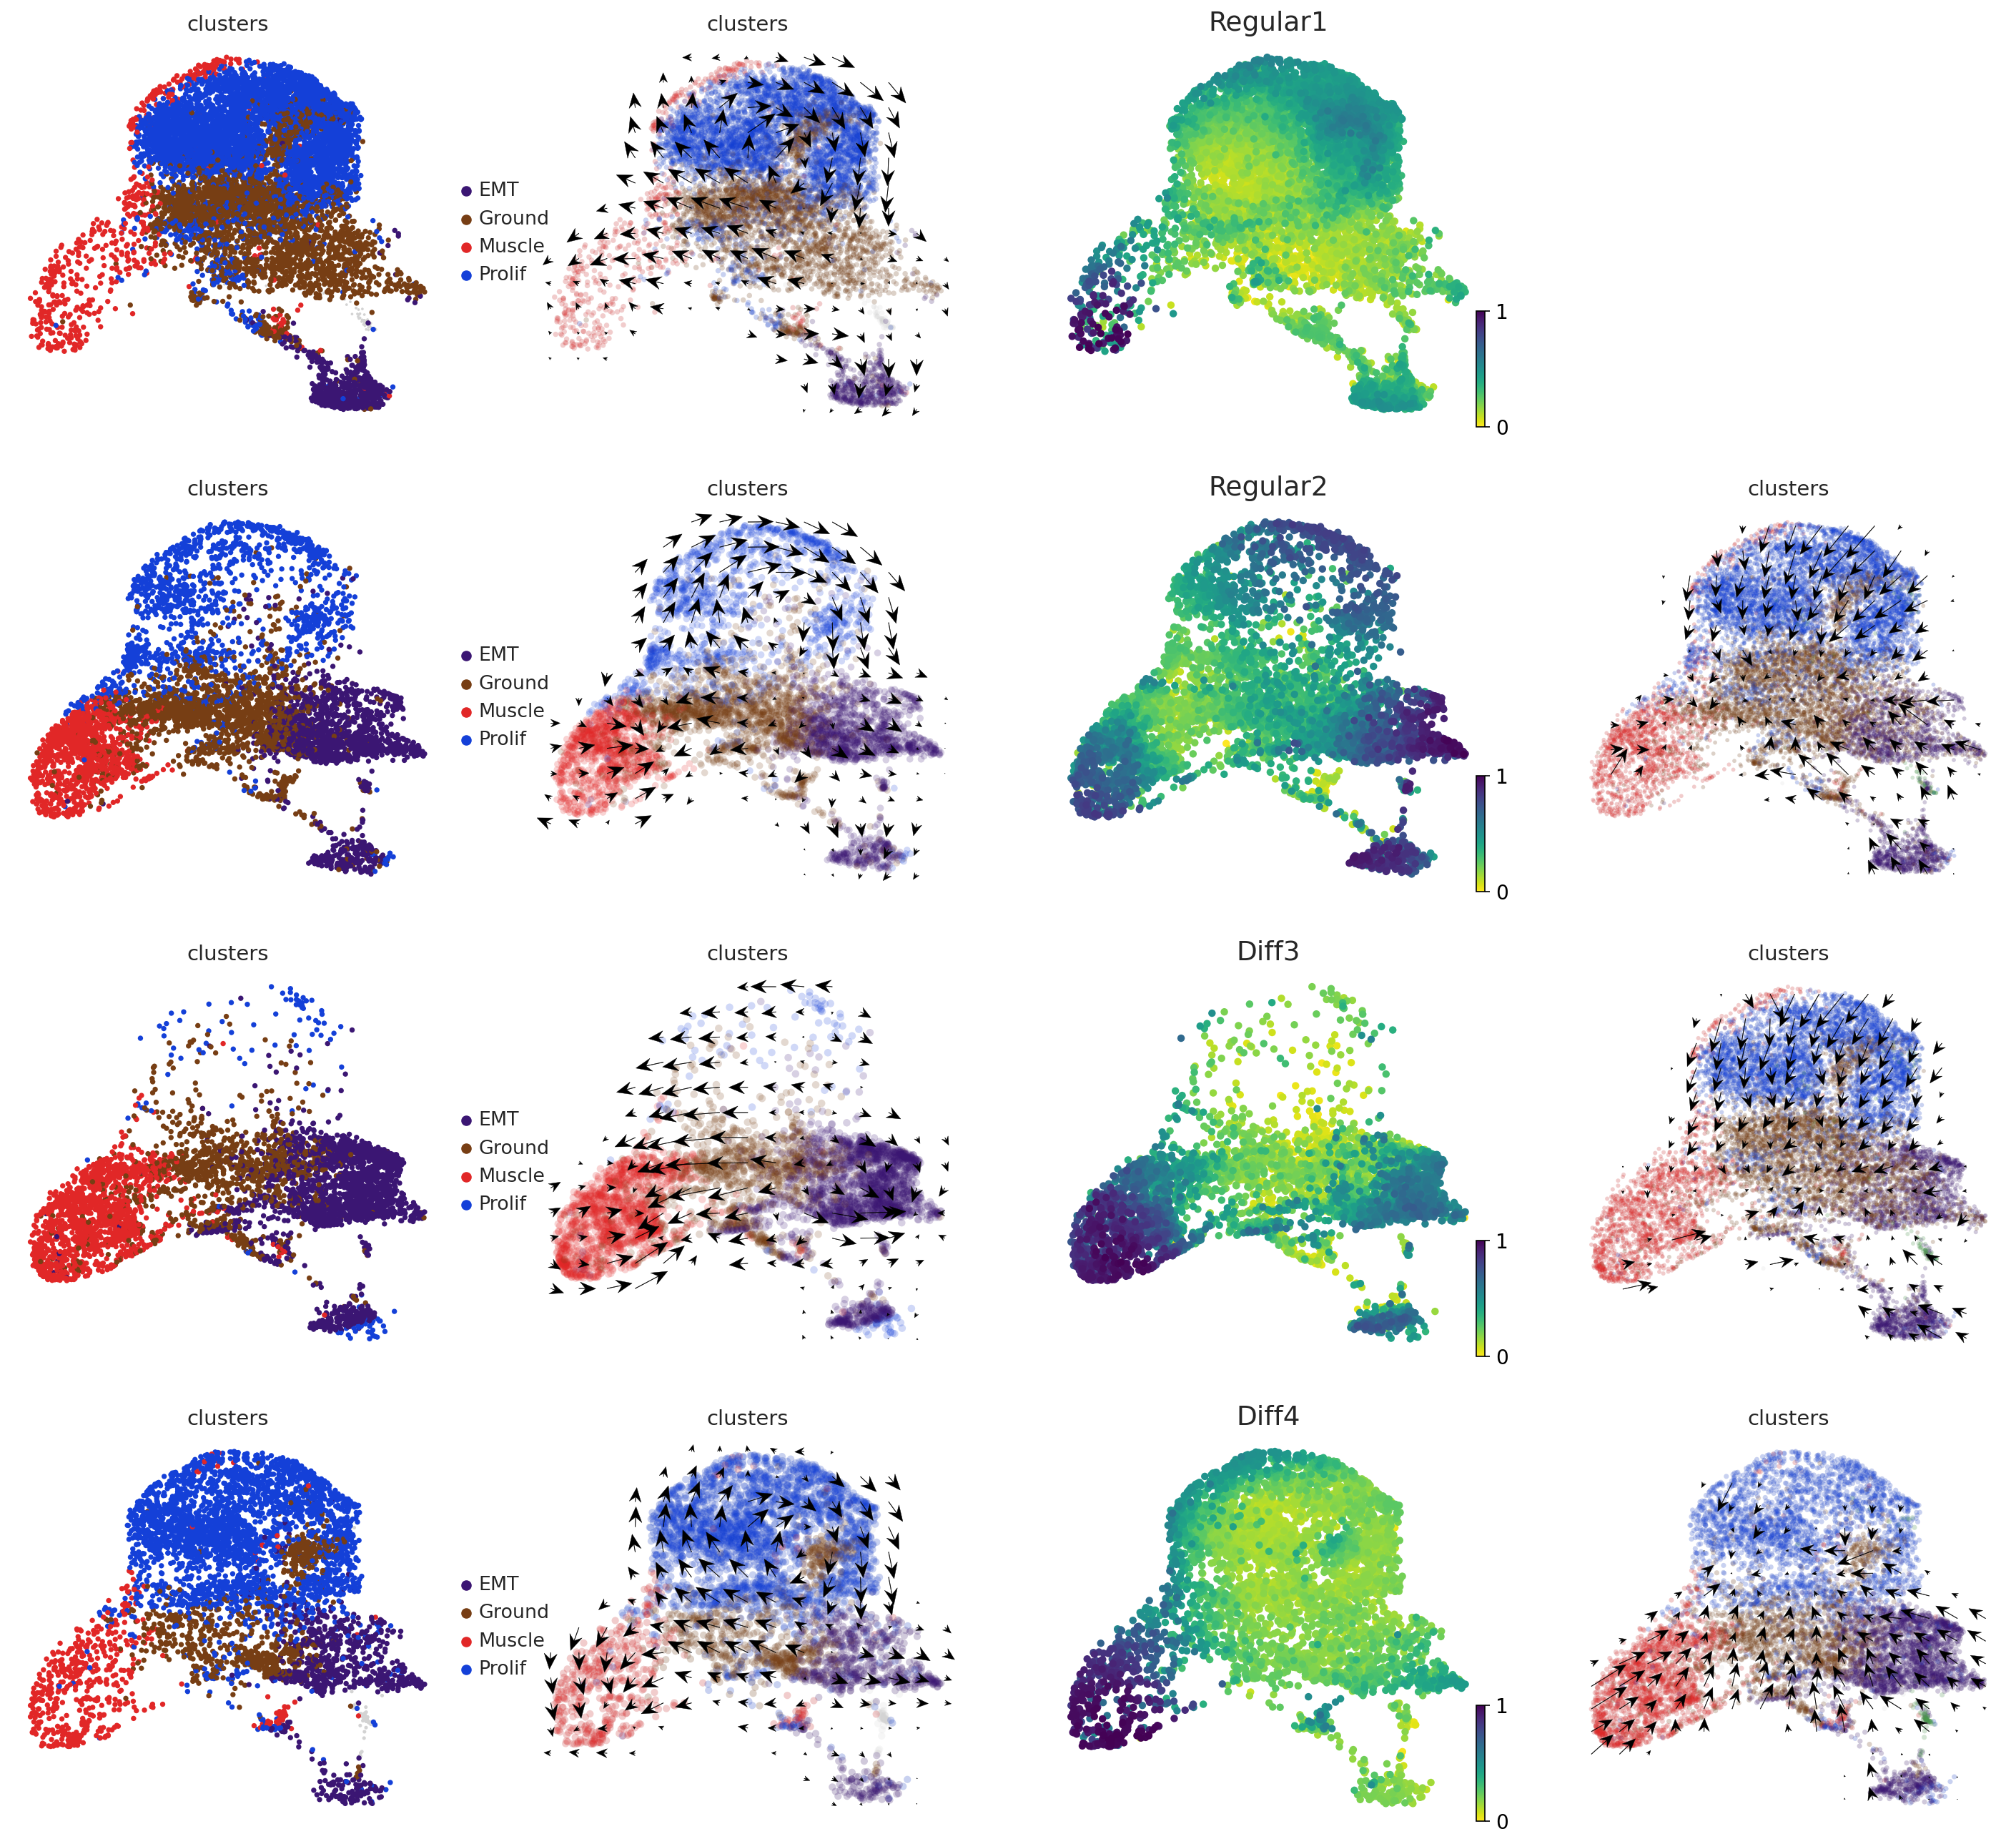

In [256]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4)

fig.set_size_inches(24, 22)

n = 0
for obj, title in zip([reg1, reg2, diff3, diff4], 
                      ['Regular1', 'Regular2', 'Diff3', "Diff4"]):
    scv.pl.velocity_embedding_grid(obj, scale=0.25, color='clusters', ax=ax[n][1], show=False,
                                   legend_loc='none',
                                   arrow_color='black', arrow_size=6,
                                   density=0.3)
                                   #autoscale=False)
    scv.pl.umap(obj, color='clusters', ax=ax[n][0], show=False,
                legend_loc='right margin', s=50, frameon=False)
    scv.pl.scatter(obj, basis='umap', color=['latent_time'], title=title,
                   size=100, legend_fontsize=18, fontsize=18,        
                   vmin=0, vmax=1.0, s=100,
                   show=False, ax=ax[n][2])
    if n > 0:
        hl, hw, hal = scv.plotting.utils.default_arrow(None)
        quiver_kwargs = {"scale": 0.25, "angles": 'xy', "scale_units": 'xy', "width": .003,
                         "edgecolors": 'k', 'alpha': 1.0, "zorder": 10000,
                         "headlength": hl/2, "headwidth": hw/2, "headaxislength": hal/2, "linewidth": .2}

#         scv.pl.umap(adata_all, ax=ax[n][3], show=False)
        if n == 1:
#             ax[n][3].quiver(starts1[:, 0],
#                       starts1[:, 1],
#                       ends1[:, 0]-starts1[:, 0],
#                       ends1[:, 1]-starts1[:, 1], color='black', **quiver_kwargs) 
            scv.pl.velocity_embedding_grid(adata1, scale=0.25, color='clusters', ax=ax[n][3], show=False,
                                           legend_loc='none',
                                           arrow_color='black', arrow_size=5,
                                           density=0.3)
        elif n == 2:
#             ax[n][3].quiver(starts2[:, 0],
#                       starts2[:, 1],
#                       ends2[:, 0]-starts2[:, 0],
#                       ends2[:, 1]-starts2[:, 1], color='black', **quiver_kwargs)
            scv.pl.velocity_embedding_grid(adata2, scale=0.25, color='clusters', ax=ax[n][3], show=False,
                                           legend_loc='none',
                                           arrow_color='black', arrow_size=5,
                                           density=0.3)
        elif n == 3:
#             ax[n][3].quiver(starts3[:, 0],
#                       starts3[:, 1],
#                       ends3[:, 0]-starts3[:, 0],
#                       ends3[:, 1]-starts3[:, 1], color='black', **quiver_kwargs)  
            scv.pl.velocity_embedding_grid(adata3, scale=0.25, color='clusters', ax=ax[n][3], show=False,
                                           legend_loc='none',
                                           arrow_color='black', arrow_size=5,
                                           density=0.3)
    else:
        ax[n][3].axis('off')
        
    n = n + 1
    
fig.savefig("Larry_velocity_analysis.pdf")

In [257]:
reg1_latent = reg1.obs.groupby("clusters").mean('latent_time').loc[:, 'latent_time']

In [258]:
reg2_latent = reg2.obs.groupby("clusters").mean('latent_time').loc[:, 'latent_time']

In [259]:
diff3_latent = diff3.obs.groupby("clusters").mean('latent_time').loc[:, 'latent_time']

In [260]:
diff4_latent = diff4.obs.groupby("clusters").mean('latent_time').loc[:, 'latent_time']

In [261]:
result_latent = pd.concat([reg1_latent, reg2_latent, diff3_latent, diff4_latent], axis=1)

In [262]:
result_latent.columns = ['Regular_1', 'Regular_2', "Diff3", "Diff4"]

In [264]:
result_latent

Regular_1  Regular_2     Diff3     Diff4
clusters                                          
EMT        0.315310   0.645355  0.381090  0.230740
Ground     0.150288   0.260364  0.172135  0.202788
Muscle     0.449534   0.436192  0.664081  0.761084
Prolif     0.285185   0.468856  0.313250  0.197876

In [267]:
result_latent.to_csv("RD_Larry_latenttime.csv")

In [266]:
%pwd

'/data/langenau/alvin_singlecell/larry/claudia/second_run'